# Summer Olympic Medals from 1976 to 2008

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as st
from tabulate import tabulate
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Summer_Olympic_medalss.xlsx')
df

City  Year      Sport       Discipline           Event  \
0      Montreal  1976   Aquatics           Diving  3m springboard   
1      Montreal  1976   Aquatics           Diving  3m springboard   
2      Montreal  1976   Aquatics           Diving  3m springboard   
3      Montreal  1976   Aquatics           Diving  3m springboard   
4      Montreal  1976   Aquatics           Diving    10m platform   
...         ...   ...        ...              ...             ...   
15311   Beijing  2008  Wrestling  Wrestling Gre-R       66 - 74kg   
15312   Beijing  2008  Wrestling  Wrestling Gre-R       66 - 74kg   
15313   Beijing  2008  Wrestling  Wrestling Gre-R       55 - 60kg   
15314   Beijing  2008  Wrestling  Wrestling Gre-R       60 - 66kg   
15315   Beijing  2008  Wrestling  Wrestling Gre-R      96 - 120kg   

                        Athlete Gender Country_Code        Country  \
0               KÖHLER, Christa  Women          GDR   East Germany   
1           KOSENKOV, Aleksandr    Men          URS   Soviet Union   
2          BOGGS, Philip George    Men          USA  United States   
3      CAGNOTTO, Giorgio Franco    Men          ITA          Italy   
4        WILSON, Deborah Keplar  Women          USA  United States   
...                         ...    ...          ...            ...   
15311        GUENOT, Christophe    Men          FRA         France   
15312       KVIRKELIA, Manuchar    Men          GEO        Georgia   
15313          RAHIMOV, Vitaliy    Men          AZE     Azerbaijan   
15314            GUENOT, Steeve    Men          FRA         France   
15315             LOPEZ, Mijain    Men          CUB           Cuba   

      Event_gender   Medal  
0                W  Silver  
1                M  Bronze  
2                M    Gold  
3                M  Silver  
4                W  Bronze  
...            ...     ...  
15311            M  Bronze  
15312            M    Gold  
15313            M  Silver  
15314            M    Gold  
15315            M    Gold  

[15316 rows x 11 columns]

In [3]:
df.shape

(15316, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15316 entries, 0 to 15315
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15316 non-null  object
 1   Year          15316 non-null  int64 
 2   Sport         15316 non-null  object
 3   Discipline    15316 non-null  object
 4   Event         15316 non-null  object
 5   Athlete       15316 non-null  object
 6   Gender        15316 non-null  object
 7   Country_Code  15316 non-null  object
 8   Country       15316 non-null  object
 9   Event_gender  15316 non-null  object
 10  Medal         15316 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.3+ MB


In [5]:
df.isnull().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

In [6]:
def separate_data_types(df):
    Categorical = []
    Continous = []
    
    for column in df.columns:
        if df[column].dtypes == object:
            Categorical.append(column)
        else:
            Continous.append(column)
    return Categorical, Continous
Categorical, Continous = separate_data_types(df)

table = [Categorical, Continous]
print(tabulate({'Categorical':Categorical, 'Continous':Continous}, headers=['Categorical', 'Continous']))

Categorical    Continous
-------------  -----------
City           Year
Sport
Discipline
Event
Athlete
Gender
Country_Code
Country
Event_gender
Medal


In [7]:
def info_of_cat(col):
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is: {df[col].mode()[0]}")

In [8]:
def info_of_num(col):
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is: {df[col].mode()[0]}")

In [9]:
info_of_cat('City')

Unique values in City are: ['Montreal' 'Moscow' 'Los Angeles' 'Seoul' 'Barcelona' 'Atlanta' 'Sydney'
 'Athens' 'Beijing']
Mode of City is: Beijing


In [10]:
info_of_cat('Sport')

Unique values in Sport are: ['Aquatics' 'Archery' 'Athletics' 'Basketball' 'Boxing' 'Canoe / Kayak'
 'Cycling' 'Equestrian' 'Fencing' 'Football' 'Gymnastics' 'Handball'
 'Hockey' 'Judo' 'Modern Pentathlon' 'Rowing' 'Sailing' 'Shooting'
 'Volleyball' 'Weightlifting' 'Wrestling' 'Table Tennis' 'Tennis'
 'Badminton' 'Baseball' 'Softball' 'Taekwondo' 'Triathlon']
Mode of Sport is: Aquatics


In [11]:
info_of_cat('Discipline')

Unique values in Discipline are: ['Diving' 'Swimming' 'Water polo' 'Archery' 'Athletics' 'Basketball'
 'Boxing' 'Canoe / Kayak F' 'Cycling Road' 'Cycling Track' 'Dressage'
 'Eventing' 'Jumping' 'Fencing' 'Football' 'Artistic G.' 'Handball'
 'Hockey' 'Judo' 'Modern Pentath.' 'Rowing' 'Sailing' 'Shooting'
 'Volleyball' 'Weightlifting' 'Wrestling Free.' 'Wrestling Gre-R'
 'Synchronized S.' 'Rhythmic G.' 'Table Tennis' 'Tennis' 'Badminton'
 'Baseball' 'Canoe / Kayak S' 'Mountain Bike' 'Softball' 'Beach volley.'
 'Trampoline' 'Taekwondo' 'Triathlon' 'BMX']
Mode of Discipline is: Athletics


In [12]:
info_of_cat('Event')

Unique values in Event are: ['3m springboard' '10m platform' '4x100m freestyle relay' '400m freestyle'
 '1500m freestyle' '400m individual medley' '4x100m medley relay'
 '800m freestyle' '200m backstroke' '200m freestyle' '100m butterfly'
 '100m backstroke' '4x200m freestyle relay' '200m breaststroke'
 '100m breaststroke' '200m butterfly' '100m freestyle' 'water polo'
 'individual FITA round' '4x400m relay' '4x100m relay' 'long jump'
 'high jump' '100m hurdles' '400m' '5000m' '100m' 'pentathlon' '200m'
 'hammer throw' 'decathlon' '800m' 'shot put' '3000m steeplechase' '1500m'
 'triple jump' 'discus throw' 'javelin throw' 'marathon' '110m hurdles'
 '20km walk' '400m hurdles' 'pole vault' '10000m' 'basketball'
 '63.5 - 67kg (welterweight)' '67 - 71kg (light-middleweight)'
 '60 - 63.5kg (light-welterweight)' '71-75kg' '57 - 60kg (lightweight)'
 '75 - 81kg (light-heavyweight)' '+ 81kg (heavyweight)'
 '54 - 57kg (featherweight)' '48 - 51kg (flyweight)'
 '51 - 54kg (bantamweight)' '- 48kg (l

In [13]:
info_of_cat('Athlete')

Unique values in Athlete are: ['KÖHLER, Christa' 'KOSENKOV, Aleksandr' 'BOGGS, Philip George' ...
 'RAHIMOV, Vitaliy' 'GUENOT, Steeve' 'LOPEZ, Mijain']
Mode of Athlete is: PHELPS, Michael


In [14]:
info_of_cat('Gender')

Unique values in Gender are: ['Women' 'Men']
Mode of Gender is: Men


In [15]:
info_of_cat('Country_Code')

Unique values in Country_Code are: ['GDR' 'URS' 'USA' 'ITA' 'SWE' 'AUS' 'CAN' 'FRG' 'NED' 'GBR' 'HUN' 'JPN'
 'CUB' 'POL' 'BUL' 'NZL' 'BEL' 'MEX' 'JAM' 'FIN' 'ROU' 'POR' 'FRA' 'BRA'
 'TCH' 'TRI' 'YUG' 'VEN' 'PUR' 'PRK' 'BER' 'THA' 'ESP' 'DEN' 'SUI' 'PAK'
 'KOR' 'NOR' 'AUT' 'IRI' 'MGL' 'ETH' 'TAN' 'GUY' 'UGA' 'IRL' 'IND' 'ZIM'
 'GRE' 'LIB' 'CHN' 'NGR' 'KEN' 'MAR' 'CIV' 'ALG' 'TUR' 'CMR' 'ZAM' 'DOM'
 'ISL' 'EGY' 'COL' 'PER' 'TPE' 'SYR' 'CRC' 'SUR' 'INA' 'DJI' 'SEN' 'PHI'
 'AHO' 'ISV' 'CHI' 'ARG' 'EUN' 'GER' 'BAH' 'RSA' 'NAM' 'QAT' 'LTU' 'MAS'
 'CRO' 'LAT' 'EST' 'GHA' 'ISR' 'SLO' 'IOP' 'RUS' 'UKR' 'BLR' 'BDI' 'ECU'
 'MOZ' 'CZE' 'TUN' 'KAZ' 'TGA' 'UZB' 'SVK' 'MDA' 'GEO' 'HKG' 'ARM' 'AZE'
 'KSA' 'BAR' 'SRI' 'URU' 'KGZ' 'KUW' 'VIE' 'MKD' 'SCG' 'ERI' 'PAR' 'UAE'
 'SRB' 'PAN' 'SUD' 'MRI' 'TOG' 'TJK' 'SIN' 'AFG']
Mode of Country_Code is: USA


In [16]:
info_of_cat('Country')

Unique values in Country are: ['East Germany' 'Soviet Union' 'United States' 'Italy' 'Sweden'
 'Australia' 'Canada' 'West Germany' 'Netherlands' 'United Kingdom'
 'Hungary' 'Japan' 'Cuba' 'Poland' 'Bulgaria' 'New Zealand' 'Belgium'
 'Mexico' 'Jamaica' 'Finland' 'Romania' 'Portugal' 'France' 'Brazil'
 'Czechoslovakia' 'Trinidad and Tobago' 'Yugoslavia' 'Venezuela'
 'Puerto Rico*' 'Korea, North' 'Bermuda*' 'Thailand' 'Spain' 'Denmark'
 'Switzerland' 'Pakistan' 'Korea, South' 'Norway' 'Austria' 'Iran'
 'Mongolia' 'Ethiopia' 'Tanzania' 'Guyana' 'Uganda' 'Ireland' 'India'
 'Zimbabwe' 'Greece' 'Lebanon' 'China' 'Nigeria' 'Kenya' 'Morocco'
 "Cote d'Ivoire" 'Algeria' 'Turkey' 'Cameroon' 'Zambia'
 'Dominican Republic' 'Iceland' 'Egypt' 'Colombia' 'Peru' 'Taiwan' 'Syria'
 'Costa Rica' 'Suriname' 'Indonesia' 'Djibouti' 'Senegal' 'Philippines'
 'Netherlands Antilles*' 'Virgin Islands*' 'Chile' 'Argentina'
 'Unified team' 'Germany' 'Bahamas' 'South Africa' 'Namibia' 'Qatar'
 'Lithuania' 'Malaysia' 

In [17]:
info_of_cat('Event_gender')

Unique values in Event_gender are: ['W' 'M' 'X']
Mode of Event_gender is: M


In [18]:
info_of_cat('Medal')

Unique values in Medal are: ['Silver' 'Bronze' 'Gold']
Mode of Medal is: Bronze


In [19]:
info_of_num('Year')

Unique values in Year are: [1976 1980 1984 1988 1992 1996 2000 2004 2008]
Mode of Year is: 2008


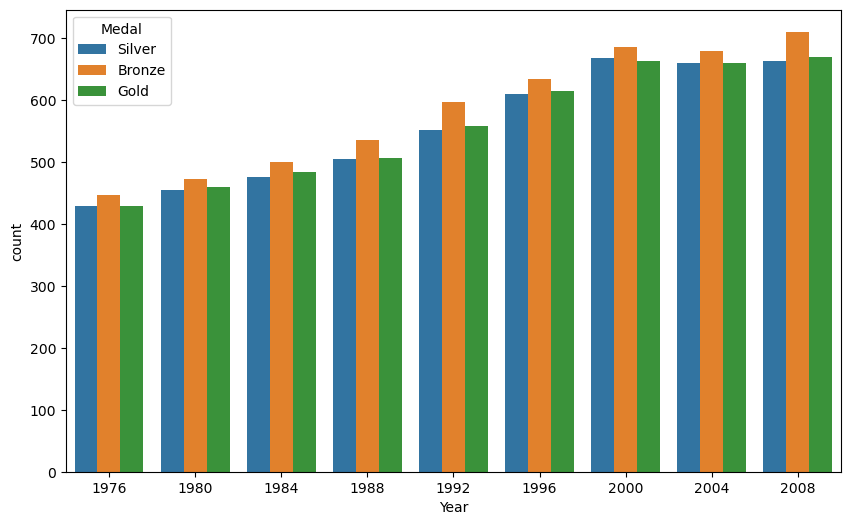

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='Year', hue='Medal', data=df)
plt.show()

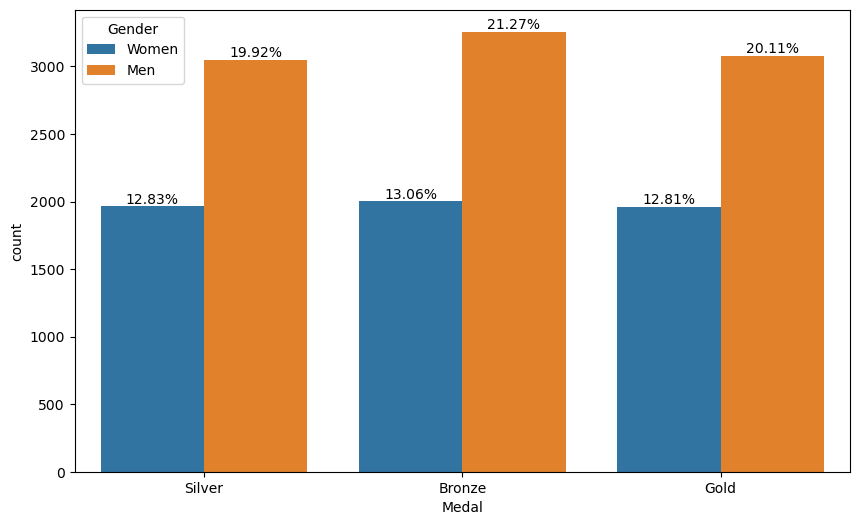

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x = df['Medal'], hue = df['Gender'])

for bar in ax.patches:
    percentage = f"{round(bar.get_height()/len(df)*100,2)}%"
    
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    ax.annotate(percentage, (x,y), va='bottom', ha='center')
    
plt.show()

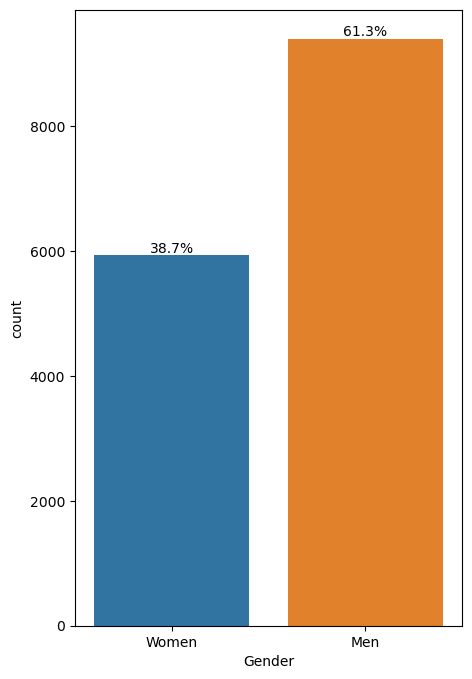

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.countplot(x = df['Gender'])

for bar in ax.patches:
    percentage = f"{round(bar.get_height()/len(df)*100,2)}%"
    
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()
    ax.annotate(percentage, (x,y), va='bottom', ha='center')
    fig.set_figheight(8)
    fig.set_figwidth(5)
plt.show()

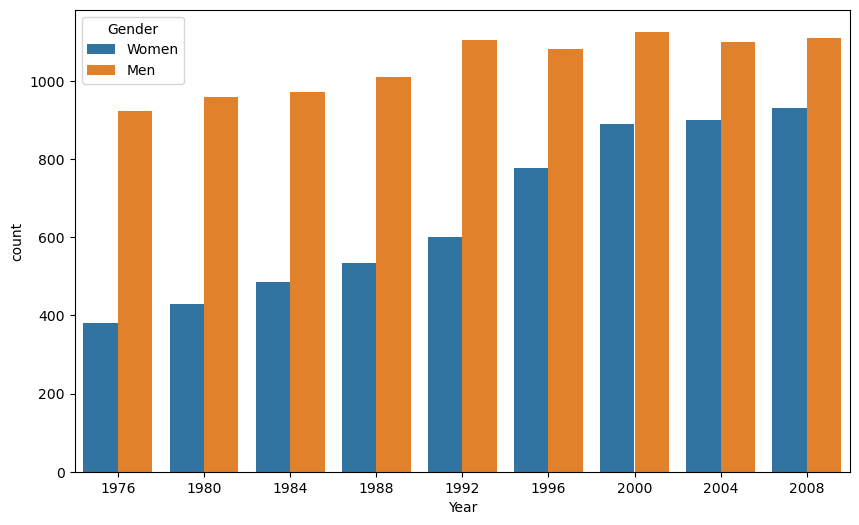

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='Year', hue='Gender', data=df)
plt.show()

In [24]:
Men - 9388
Women - 5928

NameError: name 'Men' is not defined